<h1>
    <b>POSTTEST 6</b>
</h1>
<h3>
    Kecerdasan Buatan
</h3>

<p>
    Nama : Tegar Fitrah Naba Atthoriq
    <br>
    NIM : 2009106085
</p>
<hr>

<h2>
    <b>Unsupervised Learning</b>
</h2>
<p>
    sebelum masuk ke posttest kali ini, ada beberapa hal yang perlu dilakukan yaitu :
</p>
<p>
    a. Import library yang akan digunakan untuk posttest kali ini
</p>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

<p>b. Membaca dataframe</p>

In [17]:
df = pd.read_csv('Airbnb_Open_Data.csv')

C:\Users\Tegar\AppData\Local\Temp\ipykernel_18732\2167922700.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


<p>c. Cleaning data</p>

In [18]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

# untuk float
df['host id'] = imputer_mean.fit_transform(df[['host id']])
df['lat'] = imputer_mean.fit_transform(df[['lat']])
df['long'] = imputer_mean.fit_transform(df[['long']])
df['Construction year'] = imputer_mean.fit_transform(df[['Construction year']])
df['minimum nights'] = imputer_mean.fit_transform(df[['minimum nights']])
df['number of reviews'] = imputer_mean.fit_transform(df[['number of reviews']])
df['reviews per month'] = imputer_mean.fit_transform(df[['reviews per month']])
df['review rate number'] = imputer_mean.fit_transform(df[['review rate number']])
df['calculated host listings count'] = imputer_mean.fit_transform(df[['calculated host listings count']])
df['availability 365'] = imputer_mean.fit_transform(df[['availability 365']])

# unuk integer
df['host id'] = imputer_median.fit_transform(df[['host id']])

# untuk object
df['NAME'] = imputer_modus.fit_transform(df[['NAME']])
df['host_identity_verified'] = imputer_modus.fit_transform(df[['host_identity_verified']])
df['host name'] = imputer_modus.fit_transform(df[['host name']])
df['neighbourhood group'] = imputer_modus.fit_transform(df[['neighbourhood group']])
df['neighbourhood'] = imputer_modus.fit_transform(df[['neighbourhood']])
df['country'] = imputer_modus.fit_transform(df[['country']])
df['country code'] = imputer_modus.fit_transform(df[['country code']])
df['instant_bookable'] = imputer_modus.fit_transform(df[['instant_bookable']])
df['cancellation_policy'] = imputer_modus.fit_transform(df[['cancellation_policy']])
df['room type'] = imputer_modus.fit_transform(df[['room type']])
df['price'] = imputer_modus.fit_transform(df[['price']])
df['service fee'] = imputer_modus.fit_transform(df[['service fee']])
df['last review'] = imputer_modus.fit_transform(df[['last review']])
df['house_rules'] = imputer_modus.fit_transform(df[['house_rules']])
df['license'] = imputer_modus.fit_transform(df[['license']])

<p>d. Splitting data</p>

In [19]:
data_x = df[['lat','long','Construction year','minimum nights','number of reviews','reviews per month','review rate number','calculated host listings count','availability 365']]

<h3><b>1. K-Means Clustering</b></h3>

<p>
    clustering kali ini menggunakan jumlah cluster sebanyak 5
</p>

In [20]:
cluster = KMeans(n_clusters=5)
cluster.fit(data_x)

labels = cluster.labels_
print(labels)

[4 2 4 ... 4 4 1]


<h3><b>2. Evaluasi</b></h3>

In [21]:
dfKMeans = pd.DataFrame({'label': labels, 'license': df.license})

ct = pd.crosstab(dfKMeans['label'], dfKMeans['license'])
print(ct)

license  41662/AL
label            
0            1280
1           50278
2           20961
3            4144
4           25936


<h3><b>3. Visualisasi</b></h3>

<p>
    visualisasi data pada clustering ini menggunakan scatter plot
</p>

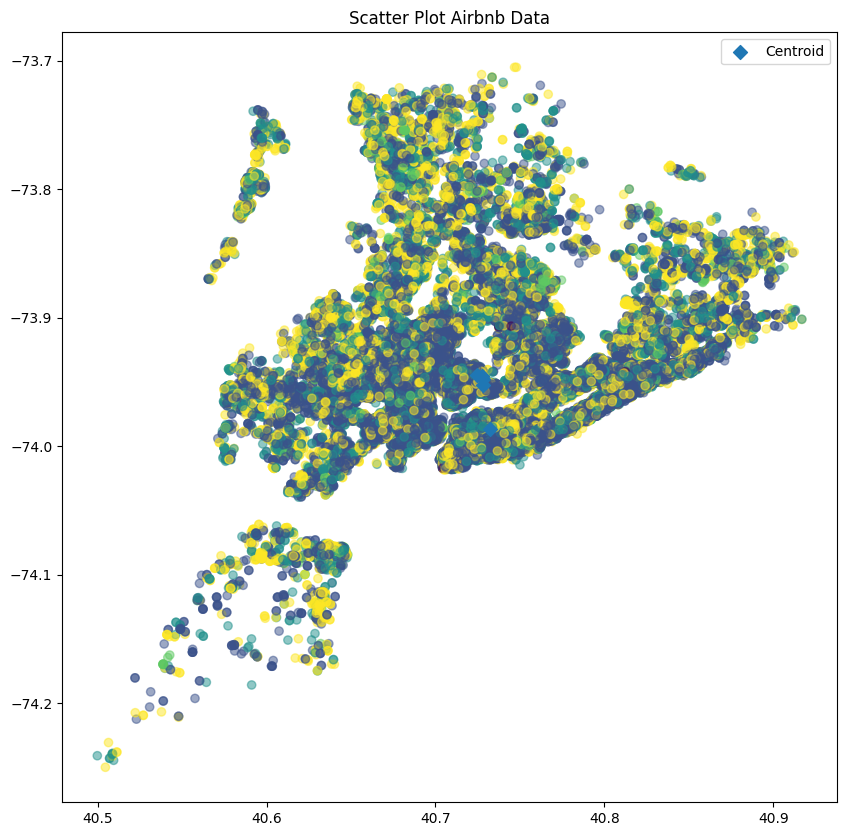

In [22]:
xs = data_x.iloc[:,0]
ys = data_x.iloc[:,1]

centroids = cluster.cluster_centers_

cen_x = centroids[:,0]
cen_y = centroids[:,1]

plt.figure(figsize=(10,10))
plt.scatter(xs,ys,alpha=0.5,c=labels)
plt.scatter(cen_x,cen_y,marker="D",s=50,label="Centroid")
plt.title("Scatter Plot Airbnb Data")
plt.legend()
plt.show()